presentado por JOAN MAURICIO YANZA RUIZ
Esta es la version completa del parcial

# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd


1)Construir una función de python paramétrica para determinar el valor de R.  y=f(R,θ,vox,voy,b,g)

In [ ]:
def posicion_y(R,theta,v0,b,g):
  termino_1 = (g/b) + (v0 * np.sin(theta))
  termino_2 = R / (v0 * np.cos(theta))
  termino_3 = g / (b**2)
  termino_4 = 1- (R*b)/(v0*np.cos(theta))

  y = termino_1 * termino_2 + termino_3 * (np.log(termino_4))
  return y

2)Asumiento que la bolita es lanzada con una rapidez de  v0=55m/s  y un ángulo de  45∘  respecto a la horizontal,  b=0.005  y  g=9.8m/s2 , determine el alcance máximo. Emplee el método que desee.

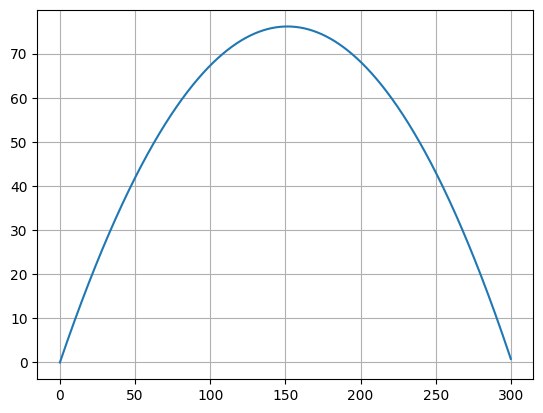

In [ ]:
v0 = 55
theta = 45 *np.pi/180
b = 0.005
g = 9.8

R=np.arange(0,300,0.1)

y = posicion_y(R,theta,v0,b,g)

plt.plot(R,y)
plt.grid()
plt.show();

In [ ]:
R1 = optimize.newton(posicion_y,350,args=(theta,v0,b,g))
print(" El alcance maximo de la bolita es de ", R1, "metros")


 El alcance maximo de la bolita es de  300.69207669320116 metros


3)Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo  tv

In [ ]:
R2 = optimize.bisect(posicion_y,250,350,args=(theta,v0,b,g))
print(" El alcance maximo de la bolita es de ", R2, "metros, con lo cual se valida el anterior resultado")

 El alcance maximo de la bolita es de  300.69207669319127 metros, con lo cual se valida el anterior resultado


In [ ]:
#CALCULO DE TIEMPO DE VUELO:

p = (-1/b)
q = (R2*b) / (v0 *np.cos(theta))
tv = p* np.log(1-q)

print("El tiempo de vuelo es " , tv, "segundos")

El tiempo de vuelo es  7.885101833164226 segundos


Construya una gráfica de  x  vs  t ,  y  vs  t ,  x  vs  y . Asegurese de no superar en las trayectorias los tiempos establecidos por el tiempo de vuelo  tv .

In [ ]:
tiempo = np.arange(0,tv,0.001)

def posicion_x(v0,theta,b,t):


  termino_1 = (v0 *np.cos(theta)) / b

  termino_2 = np.exp(-b * t)

  return termino_1 * (1- termino_2)

x= posicion_x(55, theta,0.005,tiempo)

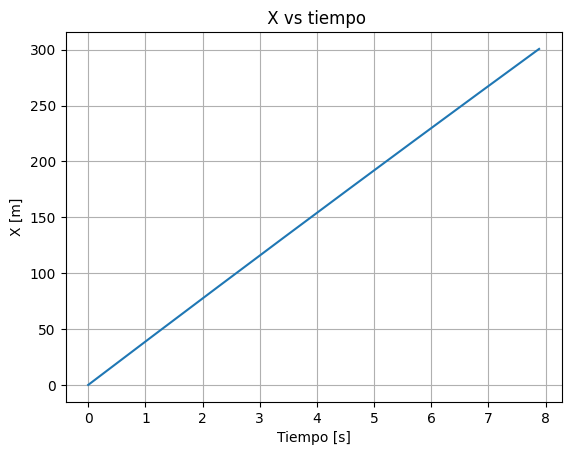

In [ ]:
#GRAFICA X VS T

plt.plot(tiempo,x)
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("X [m]")
plt.title(" X vs tiempo")
plt.show();


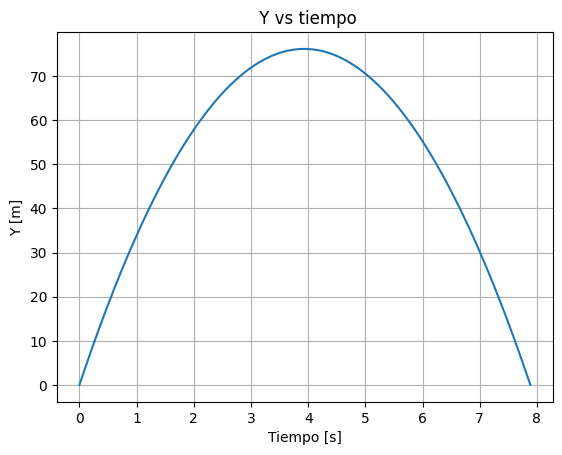

In [ ]:
#GRAFICA Y VS T

def posy_tiempo(v0,theta,b,t):

  termino_1 = 1 / b
  termino_2 = (9.8/b) + (v0 * np.sin(theta))
  termino_3 = np.exp(-b * t )
  termino_4 = (9.8 / b) * t

  y = (termino_1 * termino_2 * (1- termino_3)) - termino_4
  return y

y=posy_tiempo(v0,theta,b,tiempo)

plt.plot(tiempo,y)
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("Y [m]")
plt.title(" Y vs tiempo")
plt.show();

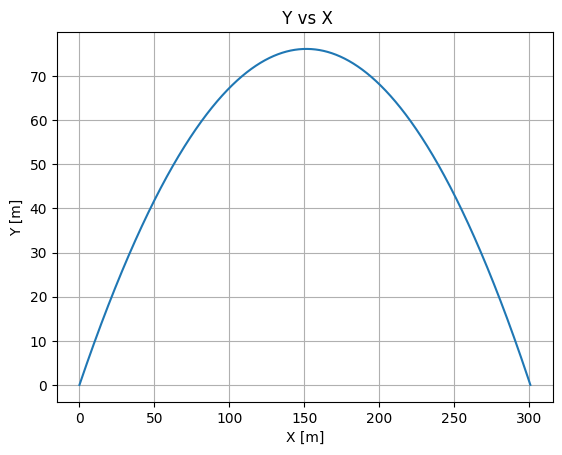

In [ ]:
#Grafica Y vs X

plt.plot(x,y)
plt.grid()
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.title(" Y vs X")
plt.show();

Suponiendo,  b=0.009 ,  v0=40m/s  y  θ  entre  0<θ<90∘  en pasos de  5∘

generalice el resultado del punto número 2 para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

In [ ]:
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
b=0.009
v0=40


In [ ]:
def posicion_y2(R,theta):
  b=0.009
  v0=40
  g=9.8
  termino_1 = (g/b) + (v0 * np.sin(theta))
  termino_2 = R / (v0 * np.cos(theta))
  termino_3 = g / (b**2)
  termino_4 = 1- (R*b)/(v0*np.cos(theta))

  y = termino_1 * termino_2 + termino_3 * (np.log(termino_4))
  return y



In [ ]:
R_a = np.zeros_like(theta)

for i in range(1,18,1):
  R_a[i] = optimize.newton(posicion_y2,300,args=(theta[i],))



In [ ]:
tabla =pd.DataFrame()
tabla["Valores de theta en radianes"] = theta
tabla["Valores de R en metros"] = R_a
tabla

,Valores de theta en radianes,Valores de R en metros
0,0.000000,0.000000
1,0.087266,28.230148
2,0.174533,55.368602
3,0.261799,80.609167
4,0.349066,103.212294
5,0.436332,122.525703
6,0.523599,138.001967
7,0.610865,149.212653
8,0.698132,155.858773
9,0.785398,157.777381


In [ ]:
#CALCULO DE TIEMPO DE VUELO para cada theta
b = 0.009
v0 = 40
g = 9.8



p = (-1 / b)
q = (R_a * b) / (v0 * np.cos(theta))
tv = p * np.log(1 - q)

tabla["Tiempos de vuelo en segundos"]= tv
tabla

,Valores de theta en radianes,Valores de R en metros,Tiempos de vuelo en segundos
0,0.000000,0.000000,-0.000000
1,0.087266,28.230148,0.710718
2,0.174533,55.368602,1.414535
3,0.261799,80.609167,2.106155
4,0.349066,103.212294,2.780405
5,0.436332,122.525703,3.432275
6,0.523599,138.001967,4.056945
7,0.610865,149.212653,4.649826
8,0.698132,155.858773,5.206584
9,0.785398,157.777381,5.723170


Realice un gráfico de  R  vs  tv



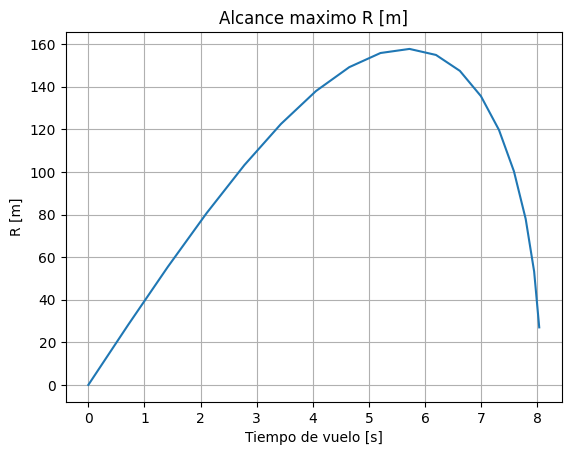

In [ ]:
plt.plot(tabla["Tiempos de vuelo en segundos"],tabla["Valores de R en metros"])
plt.grid()
plt.xlabel("Tiempo de vuelo [s]")
plt.ylabel("R [m]")
plt.title("Alcance maximo R [m]")
plt.show();

Finalmente, construya todas las trayectorias ( y vs x ) para cada ángulo θ

In [ ]:
def posicion_x2(theta,t):
  b = 0.009
  v0 = 40
  g = 9.8
  termino_1 = (v0 *np.cos(theta)) / b

  termino_2 = np.exp(-b * t)

  return termino_1 * (1- termino_2)


In [316]:
def posy_tiempo_2(theta,t):
  b = 0.009
  v0 = 40
  g = 9.8
  termino_1 = 1 / b
  termino_2 = (9.8/b) + (v0 * np.sin(theta))
  termino_3 = np.exp(-b * t )
  termino_4 = (9.8 / b) * t

  y = (termino_1 * termino_2 * (1- termino_3)) - termino_4
  return y


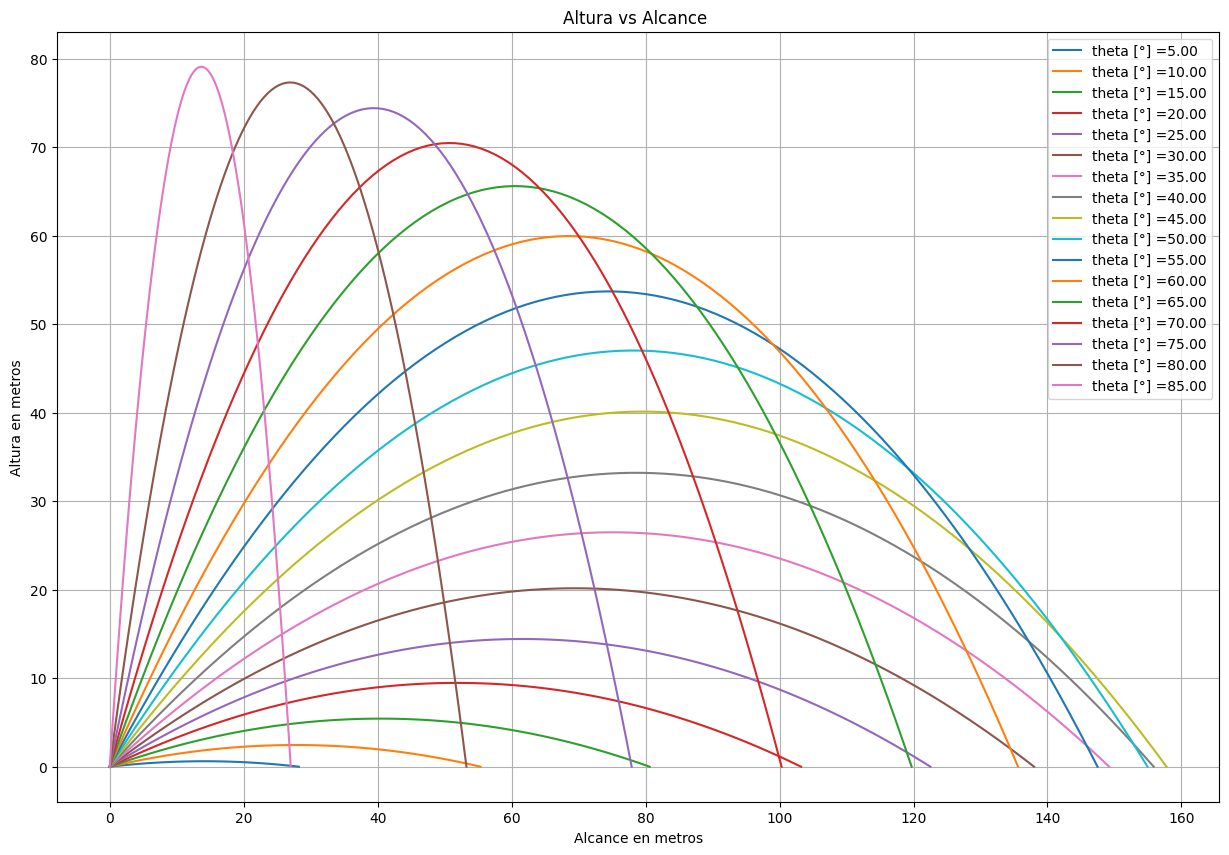

In [332]:
fig = plt.figure(figsize=(15,10))
for i in range(1,18,1):
  t1 = np.linspace(0,tv[i],100)
  x = posicion_x2(theta[i],t1)
  y = posy_tiempo_2(theta[i],t1)

  plt.plot(x,y, label="theta [°] =" + f'{(theta[i]*180/np.pi):.2f}')
  plt.title("Altura vs Alcance ")
  plt.xlabel("Alcance en metros")
  plt.ylabel("Altura en metros")
  plt.grid()
  plt.legend(loc='best')